<a href="https://colab.research.google.com/github/astrovishalthakur/DeepLearning/blob/main/Miscellaneous/VanishingGradientProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from sklearn.datasets import make_moons
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.models import Sequential

In [ ]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

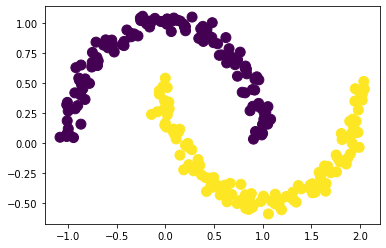

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.show()

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# first layer weights
old_weights = model.get_weights()[0]

In [ ]:
old_weights

array([[-0.07865715,  0.17468333, -0.68386686,  0.3705681 , -0.4505599 ,
        -0.68803096,  0.24505186,  0.42872244, -0.695906  ,  0.499996  ],
       [-0.09632158,  0.25661343, -0.10394204,  0.4062031 ,  0.2009201 ,
         0.21086353,  0.34487277,  0.2669381 , -0.52046657,  0.53236276]],
      dtype=float32)

In [ ]:
model.summary()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
model.fit(X_train, y_train, epochs=1)

7/7 [==============================] - 1s 3ms/step - loss: 0.7005 - accuracy: 0.5100


In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
new_weights

array([[-0.07863887,  0.17468083, -0.683883  ,  0.37056136, -0.4505754 ,
        -0.687997  ,  0.24507895,  0.42870334, -0.6959167 ,  0.49999085],
       [-0.0963323 ,  0.25661513, -0.10393032,  0.40620714,  0.20093024,
         0.21083821,  0.3448565 ,  0.26695004, -0.52045894,  0.53236604]],
      dtype=float32)

### Gradient:

$$\eta\frac{\partial{L}}{\partial{w}} = \frac{w_0 - w_n}{\eta}$$

In [ ]:
gradient = (old_weights - new_weights) / 0.001
percent_change = abs(100 * (old_weights - new_weights) / old_weights)

In [ ]:
gradient

array([[-0.01828372,  0.00250339,  0.01615286,  0.00673532,  0.01549721,
        -0.03397465, -0.02709031,  0.01910329,  0.01072884,  0.0051558 ],
       [ 0.01072138, -0.00169873, -0.01171231, -0.00405312, -0.01013279,
         0.02531707,  0.01627207, -0.01195073, -0.00762939, -0.00327826]],
      dtype=float32)

#### We can see that percentage change is very less after 1 epoch not even 1%

### Now we will see how to detect this problem

Running for few more epochs

We can see above that loss has stuck at 0.69 and not changing any further

Run model again, code block 23, block 24

In [ ]:
# first layer weights
old_weights = model.get_weights()[0]

In [ ]:
model.fit(X_train, y_train, epochs=100)

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
old_weights

array([[ 0.61228424, -0.5982146 , -0.06439179,  0.2370472 ,  0.46617848,
         0.05757982,  0.5939737 ,  0.38322026,  0.6173603 ,  0.5149471 ],
       [-0.4546554 , -0.22774404, -0.02293748,  0.09073371,  0.06845051,
         0.51151305, -0.5478035 , -0.0625869 ,  0.05046797,  0.19617957]],
      dtype=float32)

In [ ]:
new_weights

array([[ 0.61600405, -0.595144  , -0.06272628,  0.2746197 ,  0.47862473,
         0.07000411,  0.6053974 ,  0.36862165,  0.6258177 ,  0.50206965],
       [-0.45798028, -0.23043834, -0.02409832,  0.06039499,  0.05774298,
         0.5020904 , -0.5585804 , -0.05071791,  0.0424408 ,  0.20752923]],
      dtype=float32)

In [ ]:
gradient = (old_weights - new_weights) / 0.001
percent_change = abs(100 * (old_weights - new_weights) / old_weights)

In [ ]:
percent_change

array([[ 0.6075294,  0.5133028,  2.5865257, 15.850221 ,  2.6698475,
        21.577509 ,  1.9232682,  3.8094563,  1.369933 ,  2.5007353],
       [ 0.7312937,  1.183036 ,  5.060919 , 33.43709  , 15.642734 ,
         1.8421153,  1.9672889, 18.964016 , 15.905467 ,  5.7853446]],
      dtype=float32)

## Points to avoid Vanishing Gradient Problem

1. Reduce Model Complexity

In [ ]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(10,activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# first layer weights
old_weights = model.get_weights()[0]

In [ ]:
model.fit(X_train, y_train, epochs=100)

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
gradient = (old_weights - new_weights) / 0.001
percent_change = abs(100 * (old_weights - new_weights) / old_weights)

In [ ]:
percent_change

array([[ 134.95862,  580.53687, 5806.503  ,   74.5052 ,  159.59901,
         163.48848,  127.62971,   80.65983,  141.29047,  200.25761],
       [8967.356  ,  502.75717,  158.52081,  241.98828,  617.27216,
        1328.7458 ,  263.473  ,  344.07156,  376.73   ,  298.1894 ]],
      dtype=float32)

In [ ]:
old_weights

array([[-0.47700793, -0.10577643,  0.00803876, -0.550019  , -0.33860388,
         0.31544048,  0.58920735,  0.61491734, -0.35500458, -0.31118417],
       [-0.01304966, -0.25559855,  0.6747392 ,  0.52544945, -0.20296204,
         0.09212375,  0.4863767 ,  0.38016456,  0.33485585, -0.46304247]],
      dtype=float32)

In [ ]:
new_weights

array([[ 0.1667553 , -0.7198476 ,  0.47480956, -0.9598118 , -0.87901235,
         0.83114934, -0.16279635,  1.1109086 , -0.85659224, -0.9343542 ],
       [-1.1832594 ,  1.0294414 , -0.39486286,  1.7969755 ,  1.0498662 ,
        -1.1319667 ,  1.767848  , -0.9278736 ,  1.5963584 ,  0.9177012 ]],
      dtype=float32)

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# first layer weights
old_weights = model.get_weights()[0]

In [ ]:
model.fit(X_train, y_train, epochs=100)

In [ ]:
new_weights = model.get_weights()[0]

In [ ]:
gradient = (old_weights - new_weights) / 0.001
percent_change = abs(100 * (old_weights - new_weights) / old_weights)

In [ ]:
percent_change

array([[ 19.722677  ,  22.107376  ,   0.80912673,  27.110392  ,
         13.754524  ,   9.3304205 ,  32.18868   ,  35.56463   ,
          0.80674195,  19.813969  ],
       [ 20.845015  ,  20.178493  ,  30.243046  ,  29.797295  ,
        115.23078   ,   6.143304  ,  22.556238  ,  13.23905   ,
          7.8575897 ,   9.076785  ]], dtype=float32)